1.Read the file as a pandas data-frame.

In [1]:
import pandas as pd

df = pd.read_csv('/content/Eopinions.csv')

df.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


2.Perform Label Encoding on ‘class’ column

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Label'] = le.fit_transform(df[['class']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
df.head()

,class,text,Label
0,Auto,I have recently purchased a J30T with moderat...,0
1,Camera,I bought this product because I need instant ...,1
2,Auto,I have owned my Buick since 53000 km and I am...,0
3,Camera,This was my first Digital camera so I did qui...,1
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1


3.Plot a bar graph to compare the frequencies of both the classes.

<Axes: >

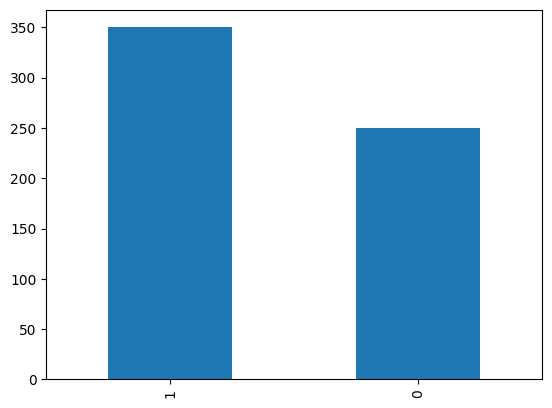

In [4]:
df['Label'].value_counts().plot(kind='bar')

4.Preprocess the ‘text’ column

In [5]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

def Tokenize(string):
  str_lst = string.split()
  return str_lst

def RemoveStopWords(string):
  str_lst = string
  stop_words = stopwords.words('english')
  for word in str_lst:
    if word.lower() in stop_words:
      str_lst.remove(word)

  return str_lst

def Lemmatize(string):
  str_lst = string
  lem = WordNetLemmatizer()
  lem_lst=[]

  for word in str_lst:
    lem_lst.append(lem.lemmatize(word))

  return lem_lst, str_lst

def Refine(string):

  string = Tokenize(string)
  string = RemoveStopWords(string)
  string, words = Lemmatize(string)
  string = " ".join(string)
  return string



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
ref = []

for sent in df['text']:
  ref.append(Refine(sent))


df['preprocesssed']  = ref

In [7]:
df.head()

,class,text,Label,preprocesssed
0,Auto,I have recently purchased a J30T with moderat...,0,have recently purchased J30T moderate mile sho...
1,Camera,I bought this product because I need instant ...,1,bought product need instant gratification stan...
2,Auto,I have owned my Buick since 53000 km and I am...,0,owned Buick since 53000 km now approaching 600...
3,Camera,This was my first Digital camera so I did qui...,1,wa first Digital camera quite bit research Unf...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,1,Minolta DiMAGE 7Hi digital SLR 5 megapixel 2 3...


5.Vectorize the text using CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def CountVectorization(args):
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(args)

  return  X.toarray()

In [9]:
vecs = CountVectorization(list(df['preprocesssed']))

In [10]:
y = list(df['Label'])

6.Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the original
data. These are your Train and Test Data.

Make sure train and test data are having same proportion of data
points as the original data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vecs, y, test_size = 0.2)

In [12]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

480 120 480 120


7.Train your machine learning algorithm for classification
and prepare a model(you can choose any appropriate algorithm
of your choice)

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

7.Now test
the model on the Test data and evaluate
the Performance by
pro
viding Confusion Matrix for your
model
.

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
y_pred = clf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
mat

array([[46,  2],
       [ 1, 71]])

In [15]:
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.975
0.9861111111111112
0.9726027397260274


8.Plot ROC Curve

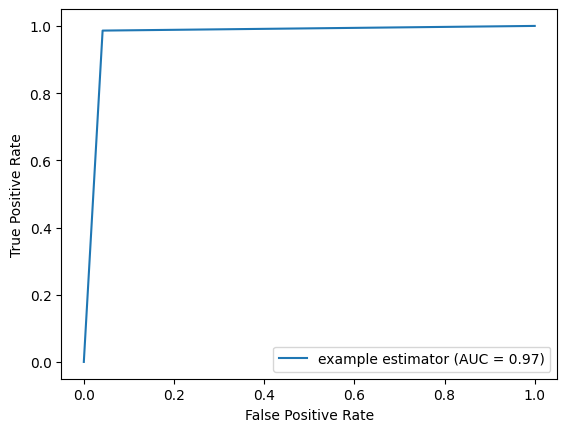

In [16]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
